# Title:  Retail_Sales_Dataset

## Problem Statement 

***This is a dataset containing information about retail sales. The goal is
to perform exploratory data analysis (EDA) to uncover patterns, trends, and insights that can
help the retail business make informed decisions.**

## Aproach 

***Cleaning**

***Data Validation**

***EDA**

***Data Visualization**

***Recommendation & Conclusion**

In [3]:
# Import Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
# Set Visualization style 
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")
import warnings 
warnings.filterwarnings("ignore")

In [4]:
# Load the dataset 
df = pd.read_csv("retail_sales_dataset.csv")

df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,11/24/2023,CUST001,Male,34,Beauty,3,50,150
1,2,2/27/2023,CUST002,Female,26,Clothing,2,500,1000
2,3,1/13/2023,CUST003,Male,50,Electronics,1,30,30
3,4,5/21/2023,CUST004,Male,37,Clothing,1,500,500
4,5,5/6/2023,CUST005,Male,30,Beauty,2,50,100


In [5]:
# Convert date to datetime
df["Date"] = pd.to_datetime(df["Date"], format= "%m/%d/%Y")
df["MONTH"] = df["Date"].dt.month
df["MONTH_NAME"] = df["Date"].dt.month_name()
df["Quarter"] = df["Date"].dt.quarter
df["Day_of_Week"] = df["Date"].dt.day_name()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   MONTH             1000 non-null   int32         
 10  MONTH_NAME        1000 non-null   object        
 11  Quarter           1000 non-null   int32         
 12  Day_of_Week       1000 non-null   object        
dtypes: datetime64[ns](1), int32(2), int64(5), object(5)
memory usage: 93.9+ KB


In [7]:
# Checking for duplicated file 

df.duplicated().sum()

0

In [8]:
# Add Calculated columns 
df["Cost Price"] = df["Price per Unit"] * 60 # Assuming 40% margin
df["Profit"] = df["Total Amount"] - (df["Quantity"] * df["Cost Price"])
df["Margin %"] = (df["Profit"] / df["Total Amount"] * 100).round(2)

In [9]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,MONTH,MONTH_NAME,Quarter,Day_of_Week,Cost Price,Profit,Margin %
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,November,4,Friday,3000,-8850,-5900.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,February,1,Monday,30000,-59000,-5900.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,January,1,Friday,1800,-1770,-5900.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,May,2,Sunday,30000,-29500,-5900.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,May,2,Saturday,3000,-5900,-5900.0


In [10]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount,MONTH,Quarter,Cost Price,Profit,Margin %
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000,6.549000,2.525000,10793.400000,-26904.000000,-5900.0
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000,1.000000,1.000000,1500.000000,-118000.000000,-5900.0
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000,4.000000,2.000000,1800.000000,-53100.000000,-5900.0
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000,6.000000,2.000000,3000.000000,-7965.000000,-5900.0
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000,10.000000,4.000000,18000.000000,-3540.000000,-5900.0
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000,12.000000,4.000000,30000.000000,-1475.000000,-5900.0
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632,3.452755,1.119208,11380.881376,33039.860262,0.0


In [11]:
print("=" * 80)
print("RETAIL SALES DATA ANALYSIS")
print("=" * 80)
print(f"\nDataset Overview:")
print(f"Total Rows: {len(df)}")
print(f"Total Columns: {len(df.columns)}")
print(f"Date Range:{df["Date"].min()} to {df["Date"].max().date()}")
print(f"\nAge Statistics:")
print(f"Max Age: {df["Age"].max()}")
print(f"Min Age: {df["Age"].min()}")
print(f"Average Age: {df["Age"].mean():.1f}")
print("\n" + "=" * 80) 

RETAIL SALES DATA ANALYSIS

Dataset Overview:
Total Rows: 1000
Total Columns: 16
Date Range:2023-01-01 00:00:00 to 2024-01-01

Age Statistics:
Max Age: 64
Min Age: 18
Average Age: 41.4



In [12]:
# Sales Performance KPIs

print("\n1. SALES PERFORMANCE KPIs")
print("-" * 40)

total_revenue = df["Total Amount"].sum()
total_transactions = df["Transaction ID"].nunique()
total_units_sold = df["Quantity"].sum()
avg_transaction_value = total_revenue / total_transactions
units_per_transaction = total_units_sold / total_transactions 

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Transactions{total_transactions}")
print(f"Total Units Sold: {total_units_sold}")
print(f"Avarage Transaction Value: ${avg_transaction_value:,.2f}")
print(f"Units per Transaction:{units_per_transaction:.2f}")


1. SALES PERFORMANCE KPIs
----------------------------------------
Total Revenue: $456,000.00
Total Transactions1000
Total Units Sold: 2514
Avarage Transaction Value: $456.00
Units per Transaction:2.51


In [13]:
df["Product Category"].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [14]:
# Sales by Month 
if len(df["MONTH"].unique()) > 1:
    monthly_sales = df.groupby(["MONTH","MONTH_NAME"])["Total Amount"].sum().reset_index()
    monthly_sales = monthly_sales.sort_values("MONTH")
    print(f"\nMonthly Sales Trend:") 
    for idx, row in monthly_sales.iterrows():
        print(f" {row["MONTH_NAME"]}: ${row["Total Amount"]:,.2f}")


Monthly Sales Trend:
 January: $36,980.00
 February: $44,060.00
 March: $28,990.00
 April: $33,870.00
 May: $53,150.00
 June: $36,715.00
 July: $35,465.00
 August: $36,960.00
 September: $23,620.00
 October: $46,580.00
 November: $34,920.00
 December: $44,690.00


In [15]:
# Customer Behavior KPIs 
print("\n2. CUSTOMER BEHAVIOR KPIs")
print("-" * 40)

total_customers = df["Customer ID"].nunique()
transactions_per_customers = df.groupby("Customer ID")["Transaction ID"].nunique()
repeat_customers = (transactions_per_customers > 1).sum()
repeat_purchase_rate = (repeat_customers / total_customers * 100) if total_customers > 0 else 0

customer_spend = df.groupby("Customer ID")["Total Amount"].sum()
avg_customer_value = customer_spend.mean()
clv = avg_customer_value * 1.5 

print(f"Total Unique Customer:{total_customers}")
print(f"Repeat Customers: {repeat_customers}")
print(f"Repeat Purchase Rate: {repeat_purchase_rate:.1f}%")
print(f"Average Customer Value: ${avg_customer_value:.2f}")
print(f"Estimated Customer Lifetime Value: ${clv:.2f}")



2. CUSTOMER BEHAVIOR KPIs
----------------------------------------
Total Unique Customer:1000
Repeat Customers: 0
Repeat Purchase Rate: 0.0%
Average Customer Value: $456.00
Estimated Customer Lifetime Value: $684.00


In [16]:
# Customer Demographics 
print(f"\nCustomer Demographics:")
print(f"Male Customers: {(df["Gender"] == "Male").sum()}")
print(f"Female Customers:{(df["Gender"] == "Female").sum()}")
print(f"Average Age: {df["Age"].mean():.1f} years")


Customer Demographics:
Male Customers: 490
Female Customers:510
Average Age: 41.4 years


In [17]:
revenue_by_gender = df.groupby("Gender")["Total Amount"].sum()
print(revenue_by_gender)

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


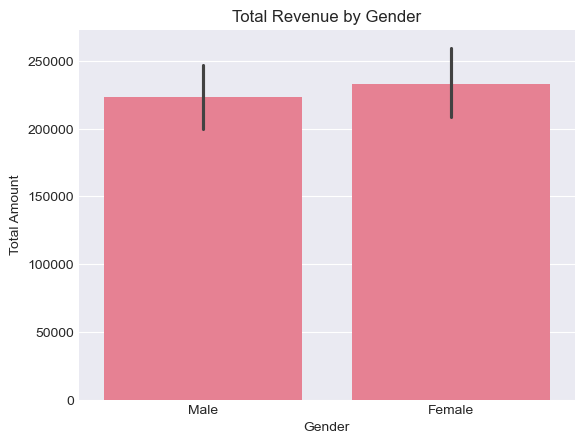

In [18]:
sns.barplot(x ="Gender", y="Total Amount", data = df, estimator=sum)

plt.title("Total Revenue by Gender")
plt.show()

In [19]:
# Product Performance KPIs
print("\n3. PRODUCT PERFORMANCE KPIs")
print("-" * 40)

category_performance = df.groupby("Product Category").agg({"Total Amount": "sum", 
                                    "Quantity":
                                    "sum",
                                    "Transaction ID": "count"}).rename(columns={"Transaction ID":"Transactions"})

category_performance["Avg Price"] = category_performance["Total Amount"] / category_performance["Quantity"]
category_performance["% of Revenue"] = (category_performance["Total Amount"] / total_revenue * 100).round(1)

print("Category Performance: ")
print(category_performance)


3. PRODUCT PERFORMANCE KPIs
----------------------------------------
Category Performance: 
                  Total Amount  Quantity  Transactions   Avg Price  \
Product Category                                                     
Beauty                  143515       771           307  186.141375   
Clothing                155580       894           351  174.026846   
Electronics             156905       849           342  184.811543   

                  % of Revenue  
Product Category                
Beauty                    31.5  
Clothing                  34.1  
Electronics               34.4  


In [20]:
# Margin analysis
total_profit = df["Profit"].sum()
gross_margin = (total_profit /
                total_revenue * 100) if total_revenue > 0 else 0
print(f"\nGross Margin: {gross_margin}:%")
print(f"Total Profit: ${total_profit:,.2f}")


Gross Margin: -5900.0:%
Total Profit: $-26,904,000.00


In [21]:
# Top categories 
top_category = category_performance["Total Amount"].idxmax()
print(f"\nTop Perfroming Category: {top_category}")
print(f"Revenue from {top_category}: $ {category_performance.loc[top_category,"Total Amount"]:,.2f}")


Top Perfroming Category: Electronics
Revenue from Electronics: $ 156,905.00


In [22]:
# PRICE & Quantity Analysis 
print("\n4. PRICE & QUANTITY ANALYSIS")
print("-" * 40)

print(f"Avarage Price per Unit:${df["Price per Unit"].mean():.2f}")
print(f"Most Common Price Point:${df["Price per Unit"].mode()[0]:.2f}")
print(f"Price per Unit:$ {df["Price per Unit"].min():.2f} - $ {df["Price per Unit"].max():.2f}")
print(f"Average Quantity per Transaction: {df["Quantity"].mean():.2f}")


4. PRICE & QUANTITY ANALYSIS
----------------------------------------
Avarage Price per Unit:$179.89
Most Common Price Point:$50.00
Price per Unit:$ 25.00 - $ 500.00
Average Quantity per Transaction: 2.51


In [23]:
# Price distribution by category 
price_by_category = df.groupby("Product Category")["Price per Unit"].agg(["mean","min","max"])
print(f"\nPrice Analysis by Category:")
print(price_by_category)


Price Analysis by Category:
                        mean  min  max
Product Category                      
Beauty            184.055375   25  500
Clothing          174.287749   25  500
Electronics       181.900585   25  500


In [24]:
# Time - Based Analysis 
print("\n5. TIME-BASED ANALYSIS")
print("-" * 40)

# Monthly Analysis
monthly_summary = df.groupby(["MONTH","MONTH_NAME"]).agg({"Total Amount": ["sum", "mean", "count"], 
                                                         "Quantity": "sum"}).round(2)
print("Monthly Summary:")
print(monthly_summary)


5. TIME-BASED ANALYSIS
----------------------------------------
Monthly Summary:
                 Total Amount               Quantity
                          sum    mean count      sum
MONTH MONTH_NAME                                    
1     January           36980  474.10    78      199
2     February          44060  518.35    85      214
3     March             28990  397.12    73      194
4     April             33870  393.84    86      214
5     May               53150  506.19   105      259
6     June              36715  476.82    77      197
7     July              35465  492.57    72      176
8     August            36960  393.19    94      227
9     September         23620  363.38    65      170
10    October           46580  485.21    96      252
11    November          34920  447.69    78      205
12    December          44690  491.10    91      207


In [25]:
# Day of week analysis 
dow_summary = df.groupby("Day_of_Week").agg({"Total Amount": ["sum","mean","count"]}).round(2)
print(f"\nDay of Week Performance: ")
print(dow_summary)


Day of Week Performance: 
            Total Amount              
                     sum    mean count
Day_of_Week                           
Friday             66290  463.57   143
Monday             70250  481.16   146
Saturday           78815  525.43   150
Sunday             58600  424.64   138
Thursday           53835  437.68   123
Tuesday            69440  431.30   161
Wednesday          58770  422.81   139


## Data Visualization


6. GENERAL VISUALIZATION...
----------------------------------------
Dahboard saved as 'retail_analysis_dashboard.png'


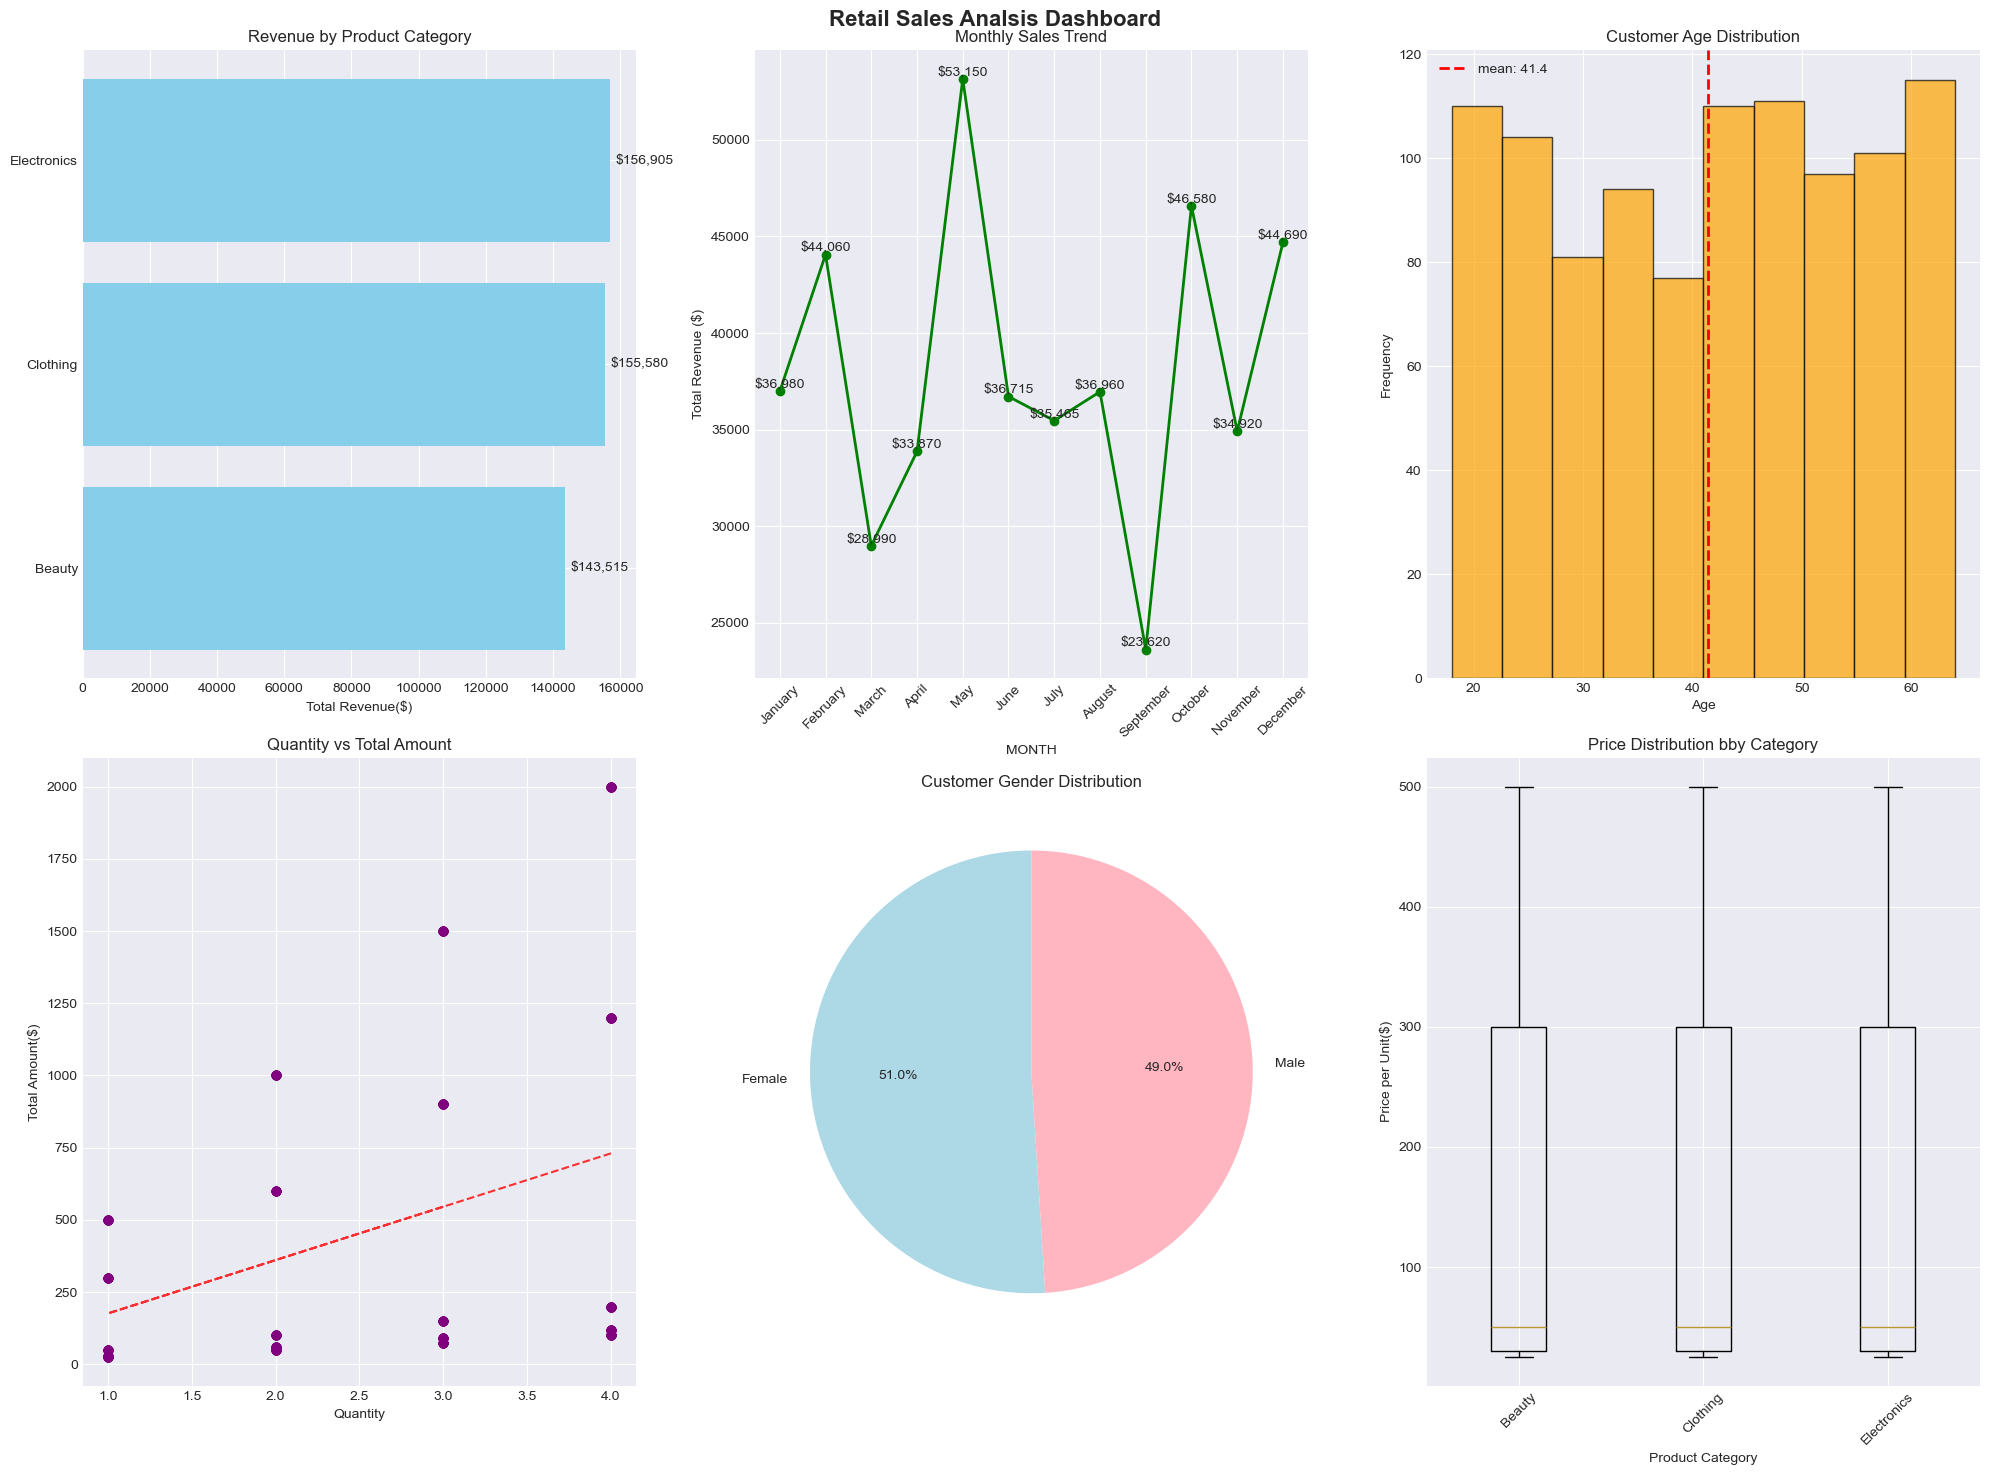

In [95]:
print("\n6. GENERAL VISUALIZATION...")
print("-" * 40)

fig, axes = plt.subplots(2, 3, figsize =(20, 15))
fig.suptitle("Retail Sales Analsis Dashboard", fontsize= 16, fontweight ="bold")

# 1. Revenue by Category 
category_revenue = df.groupby("Product Category")["Total Amount"].sum().sort_values(ascending =True)
axes[0,0].barh(category_revenue.index,category_revenue.values, color="skyblue")
axes[0,0].set_title("Revenue by Product Category")
axes[0,0].set_xlabel("Total Revenue($)")
for i, v in enumerate(category_revenue.values):
    axes[0,0].text(v + max(category_revenue.values)*0.01, i, f"${v:,.0f}", va="center")

    
# 2. Monthly Sales Trend 
if len(df["MONTH"].unique()) > 1:
    monthly_trend = df.groupby(["MONTH", "MONTH_NAME"])["Total Amount"].sum().reset_index()
    monthly_trend = monthly_trend.sort_values("MONTH")
    axes[0,1].plot(monthly_trend["MONTH_NAME"],monthly_trend["Total Amount"], marker='o',
    linewidth = 2, color ="green")
    
    axes[0,1].set_title("Monthly Sales Trend")
    axes[0,1].set_xlabel("MONTH")
    axes[0,1].set_ylabel("Total Revenue ($)")
    axes[0,1].tick_params(axis ='x', rotation = 45)
    for x, y in zip(range(len(monthly_trend)),monthly_trend["Total Amount"]): 
        axes[0,1].text(x, y, f"${y:,.0f}", ha ="center", va = "bottom") 

# 3. Customer Age Distribution 
axes[0,2].hist(df["Age"], bins =10,
               edgecolor = 'black', alpha = 0.7, 
               color='orange')
axes[0,2].axvline(df["Age"].mean(),
                  color ='red', linestyle ="dashed", linewidth =2,
label = f"mean: {df["Age"].mean():.1f}")
axes[0,2].set_title("Customer Age Distribution")
axes[0,2].set_xlabel("Age")
axes[0,2].set_ylabel("Frequency")
axes[0,2].legend()

# 4. Quantity vs Revenue Scatter 
axes[1,0].scatter(df["Quantity"],df["Total Amount"], alpha = 0.6,
                  color ="purple")
axes[1,0].set_title("Quantity vs Total Amount")
axes[1,0].set_xlabel("Quantity")
axes[1,0].set_ylabel("Total Amount($)")

# Add regression line
z = np.polyfit(df["Quantity"],df["Total Amount"], 1)
p = np.poly1d(z)
axes[1,0].plot(df["Quantity"],p(df["Quantity"]), "r--", alpha = 0.8)

# 5. Gender Distribution 
gender_counts = df["Gender"].value_counts()
axes[1,1].pie(gender_counts.values, labels = gender_counts.index, autopct = '%1.1f%%',
              colors = ["lightblue","lightpink"], startangle = 90)
axes[1,1].set_title("Customer Gender Distribution")

# 6. Price Distribution by category 
category_data = []
categories = df["Product Category"].unique()
for category in categories:
    category_data.append(df[df["Product Category"] == category]["Price per Unit"])

axes[1,2].boxplot(category_data, labels = categories)
axes[1,2].set_title("Price Distribution bby Category")
axes[1,2].set_xlabel("Product Category")
axes[1,2].set_ylabel("Price per Unit($)")
axes[1,2].tick_params(axis ='x', rotation = 45)

plt.tight_layout()
plt.savefig("retail_analysis_dashboard.png", dpi = 300, bbox_inches ='tight')
print("Dahboard saved as 'retail_analysis_dashboard.png'")

In [130]:
print("\n7. DETAIL REPORTS")
print("-" * 40)

# Comprehensive report DataFrame
report_data = {
    "Metric": [ 
        'Total Revenue',
        'Total Profit',
        'Gross Margin',
        'Total Transactions',
        'Total Units Sold',
        'Average Transaction Value',
        'Units per Transaction',
        'Total Customers',
        'Repeat Purchase Rate %',
        'Average Customer Value',
        'Estimate CLV',
        'Average Age',
        'Male/Female Ratio'
    ],
    'Value': [
        f"${total_revenue:,.2f}",
        f"${total_profit:,.2f}",
        f"{gross_margin:1f}%",
        f"{total_transactions}",
        f"{total_units_sold}",
        f"${avg_transaction_value:.2f}",
        f"{units_per_transaction:.2f}",
        f"{total_customers}",
        f"{repeat_purchase_rate:.1f}%",
        f"${avg_customer_value:.2f}",
        f"${clv:.2f}",
        f"{df['Age'].mean():.1f} years",
        f"""{(df["Gender"] == 'Male').sum()} /
        {(df["Gender"] == 'Female').sum()}"""
    ]
}

# Run this right before you call pd.DataFrame(report_data)
for key, value in report_data.items():
    print(f"{key}: {len(value)}")
    report_df = pd.DataFrame(report_data)
print("\nCOMPREHENSIVE PERFORMANCE REPORT:")
print(report_df.to_string(index = False))


7. DETAIL REPORTS
----------------------------------------
Metric: 13
Value: 13

COMPREHENSIVE PERFORMANCE REPORT:
                   Metric              Value
            Total Revenue        $456,000.00
             Total Profit    $-26,904,000.00
             Gross Margin      -5900.000000%
       Total Transactions               1000
         Total Units Sold               2514
Average Transaction Value            $456.00
    Units per Transaction               2.51
          Total Customers               1000
   Repeat Purchase Rate %               0.0%
   Average Customer Value            $456.00
             Estimate CLV            $684.00
              Average Age         41.4 years
        Male/Female Ratio 490 /\n        510


## Summary & Recommendation

In [135]:
print("\n 8. RECOMENDATIONS & INSIGHTS")
print("-" * 40)

print("\nBASED on the analysis:")
print("1. Top-performing category generates the most revenue")
print("2. Consider loyalty programs to increase repeat purchase rate")
print("3. Monitor inventory levels for high-selling categories")
print("4. Analyze seasonality patterns for better inventory planning")
print("5. Target marketing based on customer demograpics")


 8. RECOMENDATIONS & INSIGHTS
----------------------------------------

BASED on the analysis:
1. Top-performing category generates the most revenue
2. Consider loyalty programs to increase repeat purchase rate
3. Monitor inventory levels for high-selling categories
4. Analyze seasonality patterns for better inventory planning
5. Target marketing based on customer demograpics


In [137]:
# Save to Excel

with pd.ExcelWriter('retail_analysis_results.xlsx') as writer:
    df.to_excel(writer, sheet_name = 'Raw Data', index = False)

category_performance.to_excel(writer,sheet_name ='Category Performance')
monthly_summary.to_excel(writer,sheet_name ='Monthly Summary')
report_df.to_excel(writer,sheet_name ='KPI Summary', index= False)

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE!")
print("Results saved to:")
print("1. 'retail_analysis_dashboard.png' - Visualization dashboard")
print("2. 'retail_analysis_results.xlsx' - Detailed reports")
print("=" * 80)

plt.show()


ANALYSIS COMPLETE!
Results saved to:
1. 'retail_analysis_dashboard.png' - Visualization dashboard
2. 'retail_analysis_results.xlsx' - Detailed reports
